# Machine Learning, August 2021 Assignment Task

## 1 Situation
You are working for a business that produces sweets (‘candy’) for children. The business has been doing extensive research on flavours for new sweets they are designing. They have been analysing the chemicals in many different sweets and have been collecting data from children about how much they enjoy the flavours. The objective of the business is to enable them to sell more sweets to more children.

The results of phase 1 of the research are included in the attached file ‘Sweetie Flavour.csv’. The data-set consists of 18 features (x) variables, and one label called ‘Flavour_score’. The company would like to be able to predict the ‘Flavour_score’ for the new experimental sweets they are manufacturing.

The results of phase 2 of the research are included in the attached file ‘Customer Preference.csv’. The data-set consists of data from individual children. The children can be identified using their unique customer numbers (C_0000001, C_0000002, C_0000003 etc.). The other features show the amounts of each flavour chemical that made the children eat the most sweets during the experiment.

## 2 Task1
Analyse the data in the ‘Sweetie Flavour.csv’ data-file and complete the following:
1. Produce some descriptive information about the data – in both graphical and quantitative forms
2. Remove any data that is less useful whilst retaining useful information
3. Create a series of models of the data that enable you to predict the ‘Flavour_score’ given a set of input
    features:
        a. Your models should be presented in order of increasing complexity
        b. Each model should be supported by a description that explains how it is different from the other
        models
        c. Provide an assessment of the quality of each of the models
        d. Where possible, adjust the model to improve its performance.
        e. Where you adjust a model, describe how your adjustments either improve or reduce the quality
        of the model
4. Your Jupyter notebook should include ‘markdown’ cells that describe the analysis at each step.

## 3 Task2
Analyse the data in the ‘Customer Preference.csv’ data-file and complete the following:
1. Organise the children into groups that have a similar preference for flavours of sweets
2. Make a recommendation for the number of groups you would select to sell the most sweets to the
most children
3. How much of each of the flavour chemicals would you use for each group of children?

## 4 Task3
Deliver a short presentation that explains how you analysed the data for either Task 1 or Task 2. Include 1-2 slides that describe the value of this analysis and any social or ethical issues that may arise. Your presentation should take less than 10 minutes to deliver.


# Answer

## Task 1

### 1.1 Produce some descriptive information about the data – in both graphical and quantitative forms

First we need to load some libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns    # the'seaborne' library is to help visualise the dataset

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv('Sweetie Flavour.csv')

In [4]:
df.shape

(5004, 19)

In [5]:
df.dtypes

citric_acid            float64
residual_sugar         float64
density                float64
ph                     float64
Diacetyl               float64
Ethyl_maltol           float64
Ethylvanillin          float64
Limonene               float64
Manzanate              float64
Ethyl_acetate          float64
Isoamyl_acetate        float64
Pentyl_butyrate        float64
Octyl_acetate          float64
Benzyl_acetate         float64
Methyl_anthranilate    float64
Myrcene                float64
Nerolidol              float64
Camphor                float64
Flavour_Score          float64
dtype: object

In [6]:
from pandas.plotting import scatter_matrix

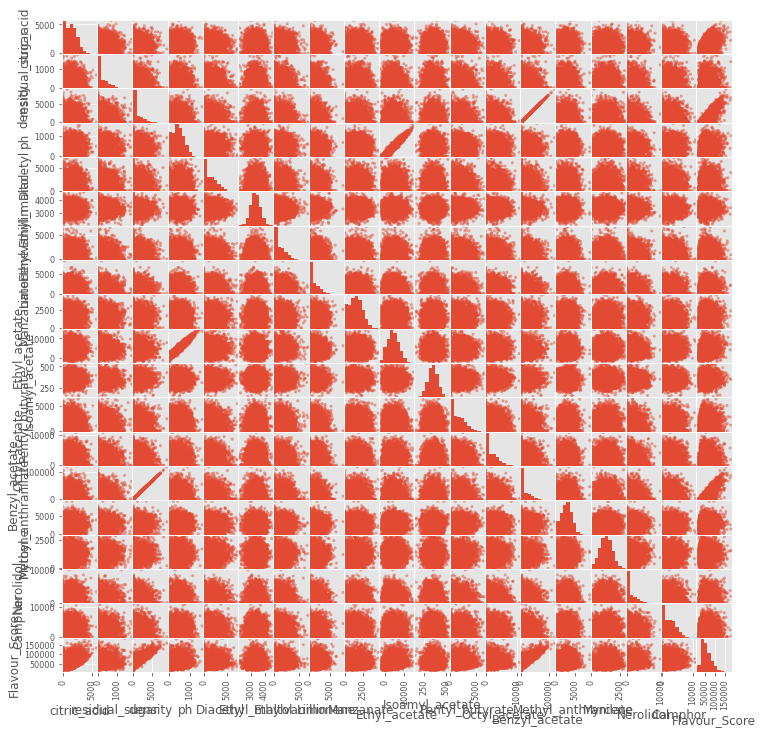

In [7]:
scatter_matrix(df, figsize=(12,12));

In [8]:
import missingno as msno

<AxesSubplot:>

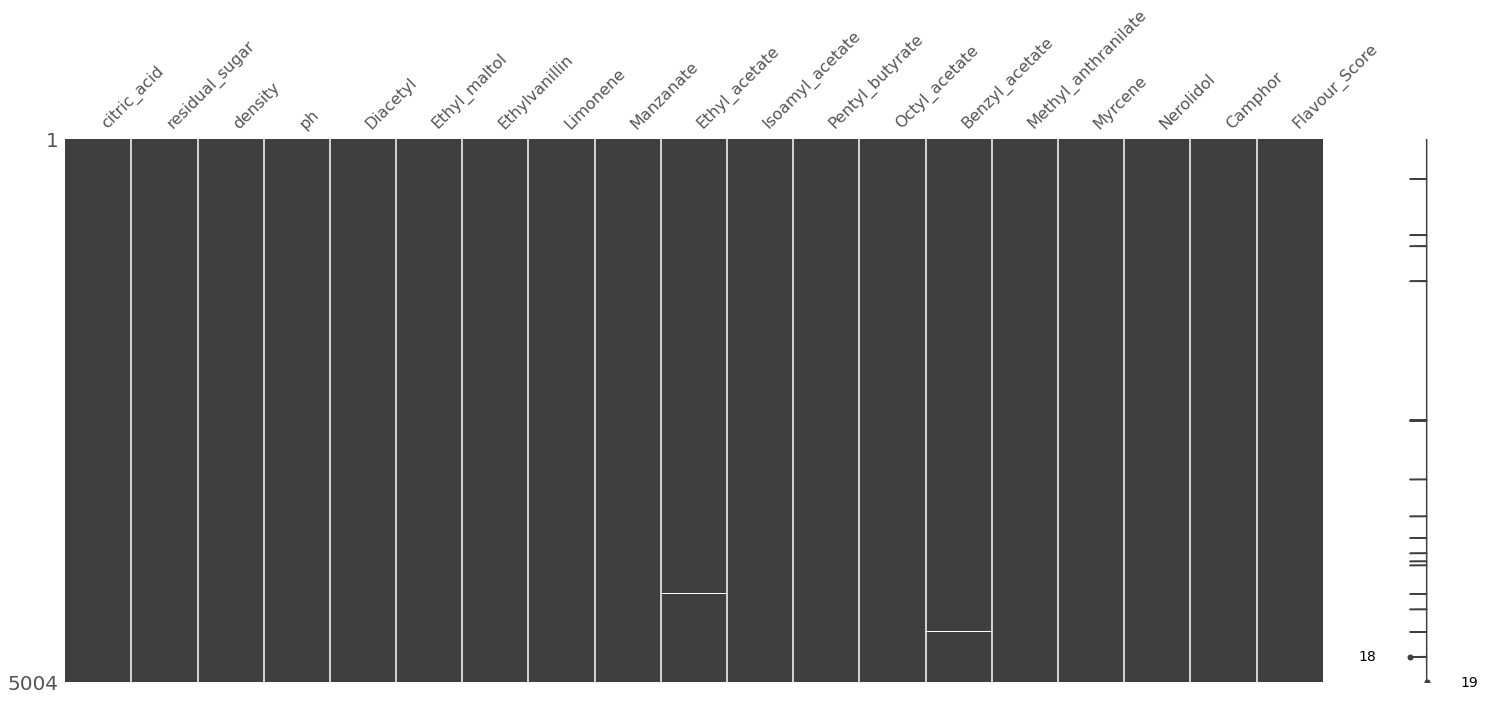

In [9]:
msno.matrix(df)

<AxesSubplot:>

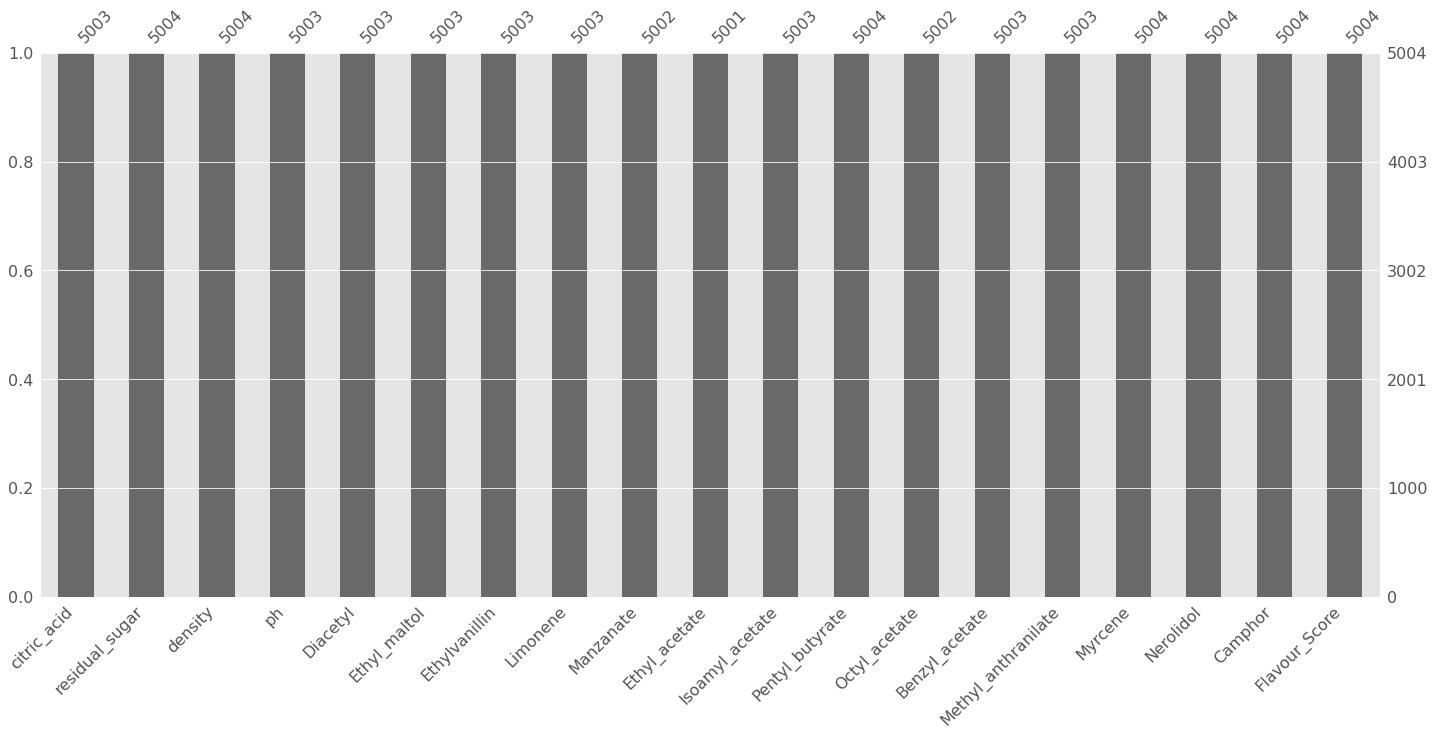

In [10]:
msno.bar(df)

In [11]:
print(df.isnull().sum().sum())

16


### 1.2 Remove any data that is less useful whilst retaining useful information

I consider all the valid values in the data are positive numbers and zeros , so the first thing to do is to define negative values as NaN.

In [12]:
df[df<0] = np.nan
df

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Benzyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor,Flavour_Score
0,2707.310,210.10,0.000,850.38,0.000,3464.270,442.026,0.000,1679.076,9260.776649,407.079,572.652,0.000,214.161478,721.969,784.980,0.000,1777.294,41589.46115
1,1746.328,377.88,0.000,342.72,0.000,2679.494,3040.074,2651.040,1836.324,3682.152536,446.661,1963.296,1713.852,NaN,2781.399,2086.794,1227.196,2231.666,49107.18748
2,913.748,278.34,3926.208,434.28,2840.101,3703.442,1703.862,762.573,1910.202,5326.242228,435.915,0.000,0.000,51954.597580,4387.451,900.594,0.000,1618.345,86875.97915
3,3975.902,0.00,807.288,0.00,1909.709,3187.820,1122.408,2109.429,1377.474,NaN,454.599,210.096,7726.248,11537.460540,3066.636,2047.086,0.000,5388.838,95197.38046
4,925.186,809.48,0.000,371.49,1703.806,3831.692,0.000,962.787,1647.702,3116.182756,330.183,3824.442,1869.840,NaN,1483.421,1358.766,980.526,253.924,40312.04507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,1367.316,107.00,0.000,0.00,2794.634,3756.262,1369.224,0.000,1867.194,NaN,300.240,0.000,3286.800,667.295399,2239.297,1401.012,0.000,204.856,28508.46350
5000,403.218,29.84,68.664,502.89,0.000,2729.920,740.898,0.000,0.000,4506.063556,323.838,1962.648,4019.472,688.937476,342.022,1356.552,2628.438,0.000,24691.65388
5001,1058.528,158.90,0.000,356.82,3411.279,3204.996,874.566,661.920,2435.286,3410.827450,356.643,3485.898,2722.248,98.661087,2606.698,2028.384,3180.122,1723.789,45542.42210
5002,0.000,447.72,0.000,584.01,291.707,3397.124,63.144,0.000,2601.564,5735.028450,368.901,73.422,0.000,308.126582,2940.725,1043.892,0.000,0.000,16502.76835


In [13]:
print(df.isnull().sum().sum())

1429


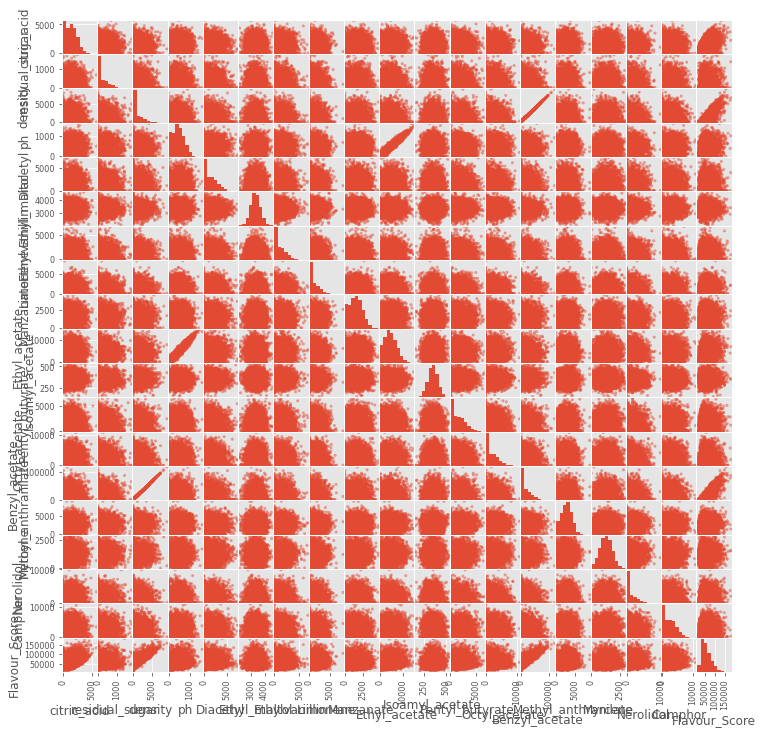

In [14]:
scatter_matrix(df, figsize=(12,12));

<AxesSubplot:>

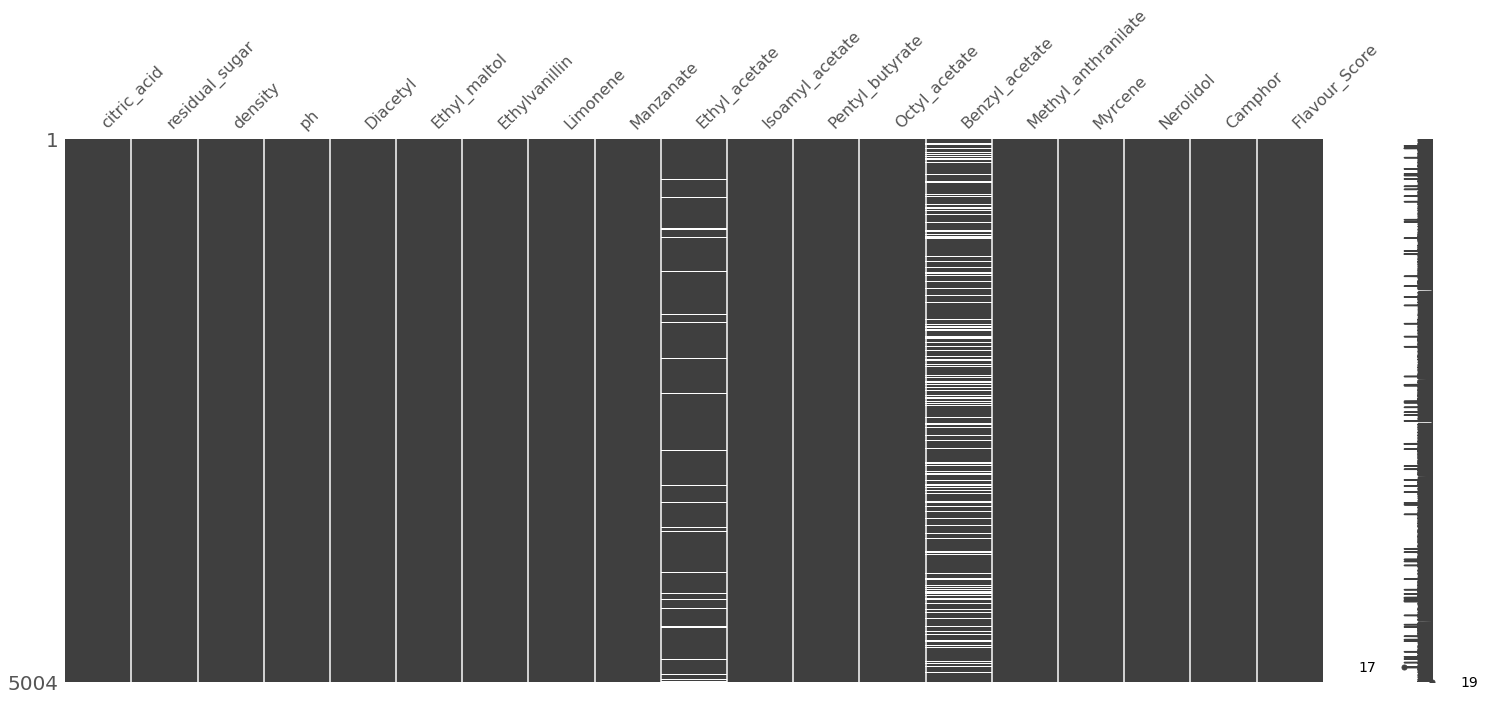

In [15]:
msno.matrix(df)

<AxesSubplot:>

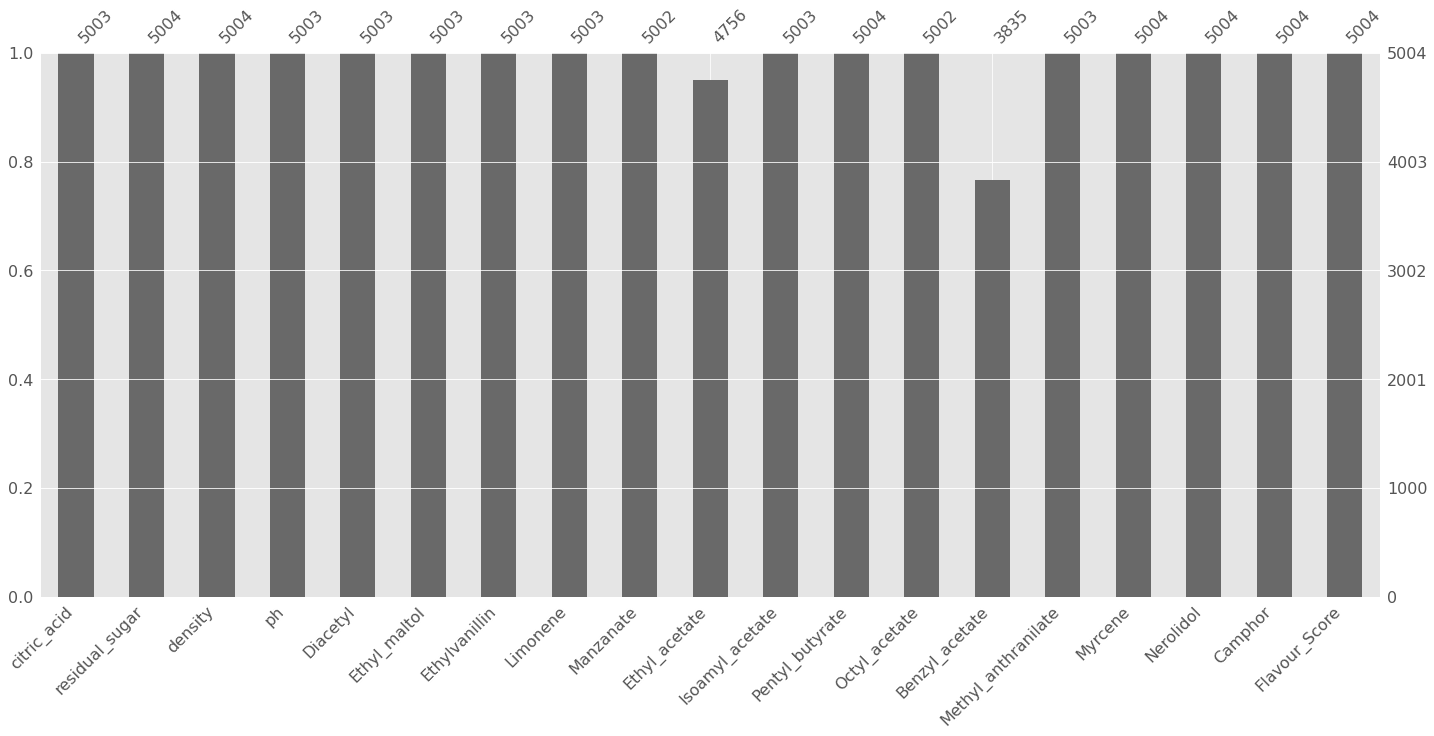

In [16]:
msno.bar(df)

In [17]:
limitPer = len(df) * .80
df.dropna(axis='columns', thresh = limitPer, inplace = True)

<AxesSubplot:>

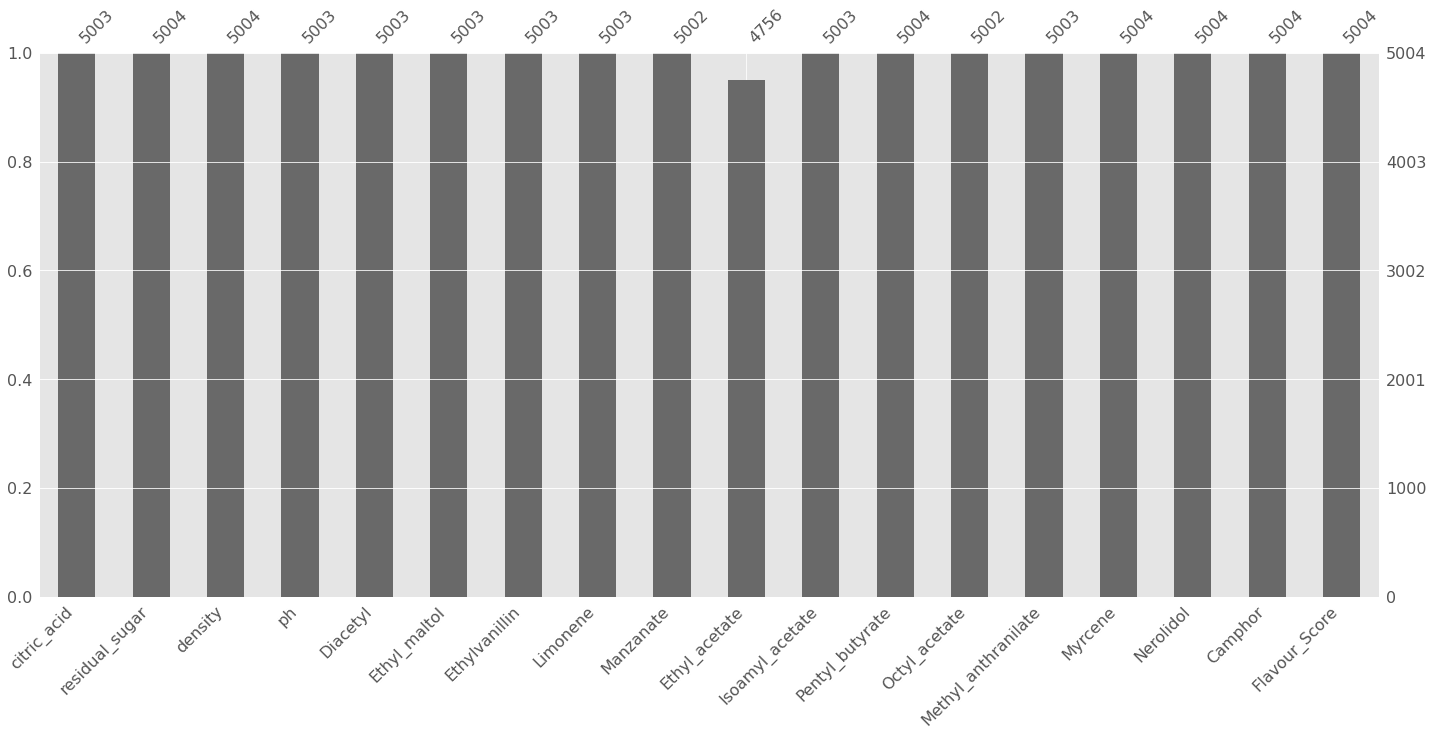

In [18]:
msno.bar(df)

In [19]:
print(df.isnull().sum().sum())

260


and then we replace the NaN values with the average values in each columns

In [20]:
for column_name in df:
    df[column_name].fillna(df[column_name].mean(), inplace = True)
df

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor,Flavour_Score
0,2707.310,210.10,0.000,850.38,0.000,3464.270,442.026,0.000,1679.076,9260.776649,407.079,572.652,0.000,721.969,784.980,0.000,1777.294,41589.46115
1,1746.328,377.88,0.000,342.72,0.000,2679.494,3040.074,2651.040,1836.324,3682.152536,446.661,1963.296,1713.852,2781.399,2086.794,1227.196,2231.666,49107.18748
2,913.748,278.34,3926.208,434.28,2840.101,3703.442,1703.862,762.573,1910.202,5326.242228,435.915,0.000,0.000,4387.451,900.594,0.000,1618.345,86875.97915
3,3975.902,0.00,807.288,0.00,1909.709,3187.820,1122.408,2109.429,1377.474,4708.203478,454.599,210.096,7726.248,3066.636,2047.086,0.000,5388.838,95197.38046
4,925.186,809.48,0.000,371.49,1703.806,3831.692,0.000,962.787,1647.702,3116.182756,330.183,3824.442,1869.840,1483.421,1358.766,980.526,253.924,40312.04507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,1367.316,107.00,0.000,0.00,2794.634,3756.262,1369.224,0.000,1867.194,4708.203478,300.240,0.000,3286.800,2239.297,1401.012,0.000,204.856,28508.46350
5000,403.218,29.84,68.664,502.89,0.000,2729.920,740.898,0.000,0.000,4506.063556,323.838,1962.648,4019.472,342.022,1356.552,2628.438,0.000,24691.65388
5001,1058.528,158.90,0.000,356.82,3411.279,3204.996,874.566,661.920,2435.286,3410.827450,356.643,3485.898,2722.248,2606.698,2028.384,3180.122,1723.789,45542.42210
5002,0.000,447.72,0.000,584.01,291.707,3397.124,63.144,0.000,2601.564,5735.028450,368.901,73.422,0.000,2940.725,1043.892,0.000,0.000,16502.76835


### 1.3 Create a series of models of the data that enable you to predict the ‘Flavour_score’ given a set of input features

#### 1.3.1 Logistic Regression

Logistic Regression is a common choice when it is required to predict probabilities from regression models - since the results of the model are in the range 0 to 1.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
X = df.loc[:,'citric_acid':'Camphor']
Y = df['Flavour_Score'].astype('int')

In [23]:
logModel = LogisticRegression(solver='liblinear',max_iter=10000)

In [24]:
logModel = logModel.fit(X, Y)

In [25]:
print(logModel.score(X,Y))

0.990607513988809


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
logModel = logModel.fit(X_train, Y_train)

In [29]:
predictions = logModel.predict(X_test)

In [30]:
print(logModel.score(X_test,Y_test))

0.0


We can see the answer is not good

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 1.3.2 Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

In [36]:
pd.isnull(df).any()

citric_acid            False
residual_sugar         False
density                False
ph                     False
Diacetyl               False
Ethyl_maltol           False
Ethylvanillin          False
Limonene               False
Manzanate              False
Ethyl_acetate          False
Isoamyl_acetate        False
Pentyl_butyrate        False
Octyl_acetate          False
Methyl_anthranilate    False
Myrcene                False
Nerolidol              False
Camphor                False
Flavour_Score          False
dtype: bool

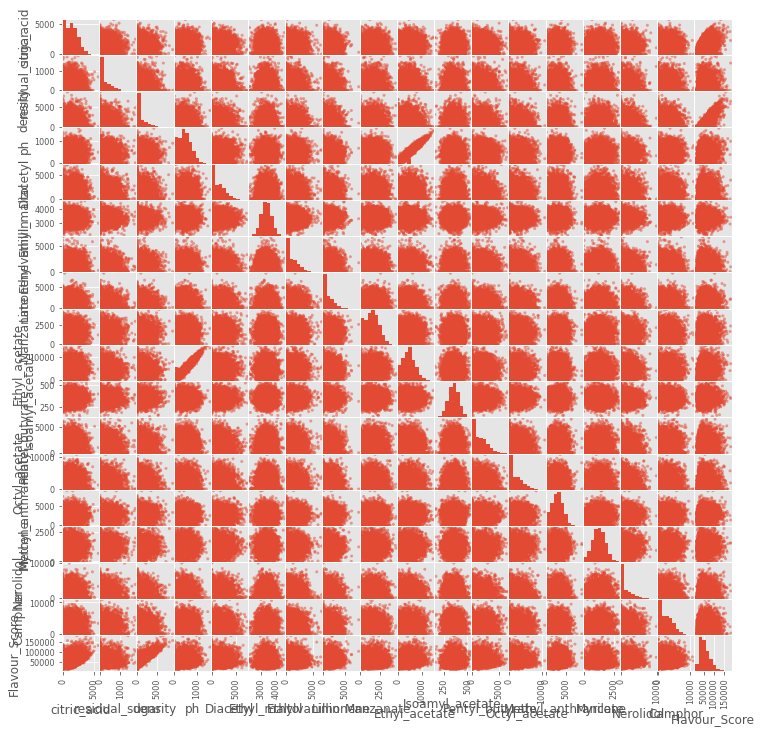

In [37]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df, figsize=(12, 12));

(18.5, -0.5)

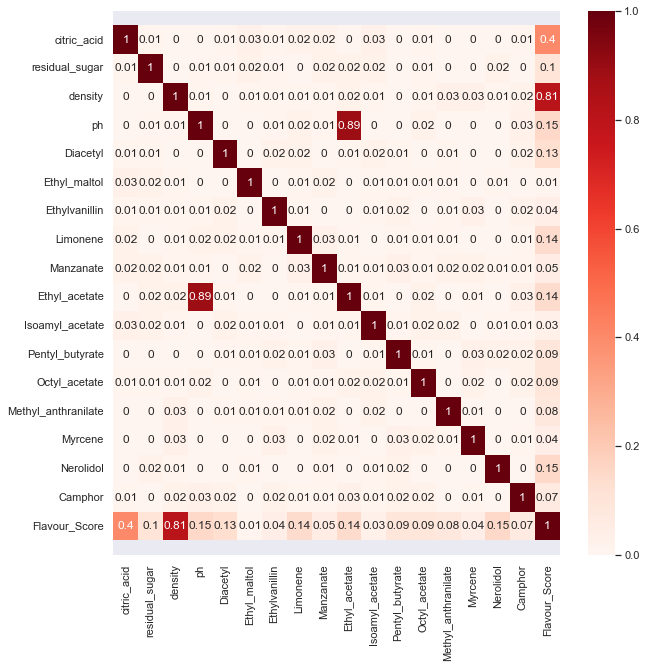

In [38]:
correlation_matrix = np.absolute(df.corr().round(2)) 
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

from this correlation map, we see that:

+ Flavour_Score is strongly correlated with density, medially correlated with citric_acid 
+ Ethyl_acetate and ph are aorrelated with each other
+ Therefore, density and citric_acid and good candidates for building our model, whearas we should not use both Ethyl_acetate and ph since we will be 'double counting' their impact on the result

In [39]:
X = pd.DataFrame(np.c_[df['density'],df['citric_acid']],columns=['density','citric_acid'])
Y = df['Flavour_Score']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 
print(X_train[0:5])

      density  citric_acid
2314  230.064      824.030
4849    0.000     1196.316
4885    0.000     1271.442
3032    0.000      508.136
1412   29.616     2016.356


#### 1.3.2 a linear regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression() 
lin_model.fit(X_train, Y_train)

LinearRegression()

In [43]:
y_train_predict = lin_model.predict(X_train)
r2_train = r2_score(Y_train, y_train_predict)
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [44]:
y_test_predict = lin_model.predict(X_test)
r2_test = r2_score(Y_test, y_test_predict)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [45]:
print("R2:")
print(" Train = ", r2_train)
print(" Test =  ", r2_test)
print("RMSE:")
print(" Train = ", rmse_train)
print(" Test =  ", rmse_test)

R2:
 Train =  0.8211342313989057
 Test =   0.767442507863419
RMSE:
 Train =  10867.729449253371
 Test =   11285.93839148227


#### 1.3.2 b polynomial regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2) 
X_train_poly = poly_features.fit_transform(X_train) 
print(poly_features.get_feature_names(["density","citric_acid"]))

['1', 'density', 'citric_acid', 'density^2', 'density citric_acid', 'citric_acid^2']


In [47]:
X_train_poly[0:5]

array([[1.00000000e+00, 2.30064000e+02, 8.24030000e+02, 5.29294441e+04,
        1.89579638e+05, 6.79025441e+05],
       [1.00000000e+00, 0.00000000e+00, 1.19631600e+03, 0.00000000e+00,
        0.00000000e+00, 1.43117197e+06],
       [1.00000000e+00, 0.00000000e+00, 1.27144200e+03, 0.00000000e+00,
        0.00000000e+00, 1.61656476e+06],
       [1.00000000e+00, 0.00000000e+00, 5.08136000e+02, 0.00000000e+00,
        0.00000000e+00, 2.58202194e+05],
       [1.00000000e+00, 2.96160000e+01, 2.01635600e+03, 8.77107456e+02,
        5.97163993e+04, 4.06569152e+06]])

In [48]:
polynomial_model = LinearRegression() 
polynomial_model.fit(X_train_poly, Y_train)
print("Model coefficients = " , polynomial_model.coef_) 
print("Constant term (bias) = ", polynomial_model.intercept_)

Model coefficients =  [ 0.00000000e+00  1.46030447e+01  1.38923594e+00 -1.03405787e-04
  1.37199500e-04  2.67381727e-03]
Constant term (bias) =  32039.96948059133


In [49]:
y_train_predicted = polynomial_model.predict(X_train_poly)
y_test_predict = polynomial_model.predict(poly_features.fit_transform(X_test))

In [50]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted)) 
r2_train = r2_score(Y_train, y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict)) 
r2_test = r2_score(Y_test, y_test_predict)
print("R2:")
print(" Train = ", r2_train)
print(" Test =  ", r2_test)
print("RMSE:")
print(" Train = ", rmse_train)
print(" Test =  ", rmse_test)

R2:
 Train =  0.8376316060756906
 Test =   0.7827140740826672
RMSE:
 Train =  10354.42410175172
 Test =   10909.084506132562


When we increase the dimensions of polynomial model from 1 to 2, we can see that it improve the quality of model.

## Task 2

In [116]:
customer_data=pd.read_csv("Customer Preference.csv")
customer_data.drop(['Customer No.'],axis=1,inplace=True)

In [117]:
# print(customer_data.isnull().sum().sum())
print(customer_data.isnull().sum())
print(customer_data.info())

citric_acid            1
residual_sugar         3
density                3
ph                     4
Diacetyl               3
Ethyl_maltol           2
Ethylvanillin          0
Limonene               4
Manzanate              2
Ethyl_acetate          1
Isoamyl_acetate        3
Pentyl_butyrate        0
Octyl_acetate          2
Benzyl_acetate         5
Methyl_anthranilate    1
Myrcene                4
Nerolidol              2
Camphor                4
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   citric_acid          9496 non-null   float64
 1   residual_sugar       9494 non-null   float64
 2   density              9494 non-null   float64
 3   ph                   9493 non-null   float64
 4   Diacetyl             9494 non-null   float64
 5   Ethyl_maltol         9495 non-null   float64
 6   Ethylvanillin        9497

In [118]:
for customer_column in customer_data:
    if(customer_data[customer_column].dtype == 'float64'):
        customer_data[customer_column].fillna(customer_data[customer_column].mean(), inplace=True)
    else:
        customer_data[customer_column].replace(to_replace ="#VALUE!",value =np.nan, inplace=True)

In [119]:
customer_data['Ethylvanillin'] = pd.to_numeric(customer_data['Ethylvanillin'])
customer_data['Pentyl_butyrate'] = pd.to_numeric(customer_data['Pentyl_butyrate'])
customer_data['Ethylvanillin'].fillna(customer_data['Ethylvanillin'].mean(), inplace=True)
customer_data['Pentyl_butyrate'].fillna(customer_data['Pentyl_butyrate'].mean(), inplace=True)

In [120]:
print(customer_data.isnull().sum())
customer_data.info()

citric_acid            0
residual_sugar         0
density                0
ph                     0
Diacetyl               0
Ethyl_maltol           0
Ethylvanillin          0
Limonene               0
Manzanate              0
Ethyl_acetate          0
Isoamyl_acetate        0
Pentyl_butyrate        0
Octyl_acetate          0
Benzyl_acetate         0
Methyl_anthranilate    0
Myrcene                0
Nerolidol              0
Camphor                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   citric_acid          9497 non-null   float64
 1   residual_sugar       9497 non-null   float64
 2   density              9497 non-null   float64
 3   ph                   9497 non-null   float64
 4   Diacetyl             9497 non-null   float64
 5   Ethyl_maltol         9497 non-null   float64
 6   Ethylvanillin        9497

<AxesSubplot:>

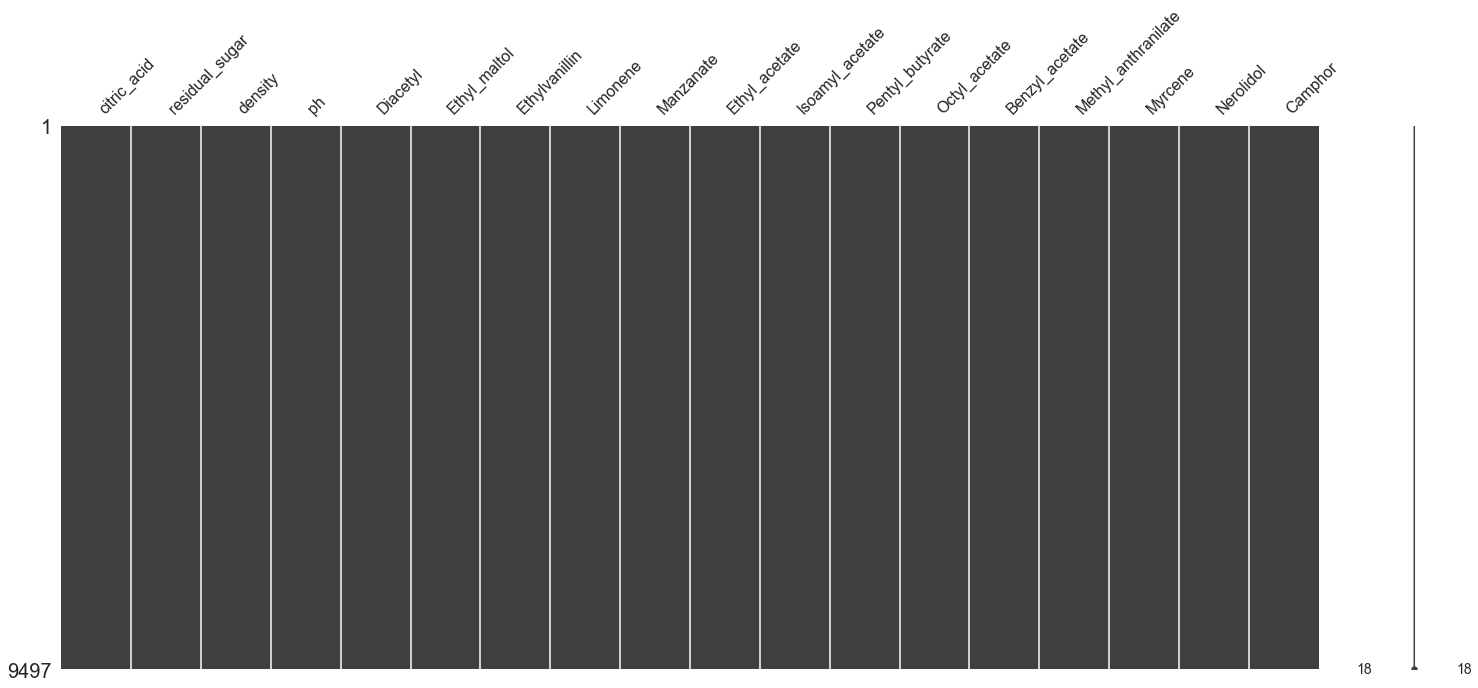

In [121]:
import missingno as msno
msno.matrix(customer_data)

<AxesSubplot:>

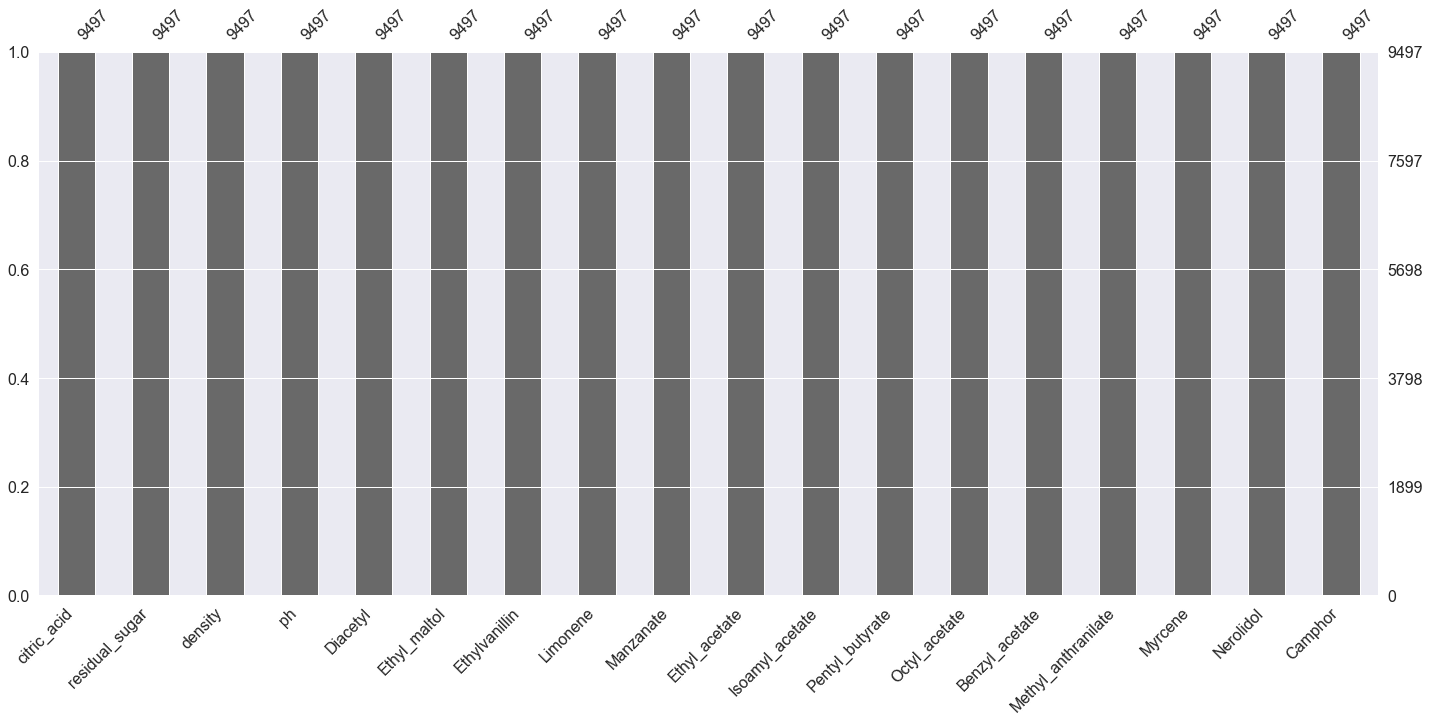

In [122]:
msno.bar(customer_data)

In [123]:
customer_data[0:5]

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Benzyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor
0,1438.0,1801.0,2026.0,1895.0,561.0,1800.0,5082.0,625.0,1120.0,1453.0,523.0,9140.0,799.0,1829.0,1869.0,991.0,957.0,1970.0
1,840.0,1738.0,1127.0,1698.0,2117.0,540.0,5782.0,2049.0,815.0,1452.0,783.0,8959.0,2116.0,1004.0,743.0,747.0,517.0,823.0
2,1815.0,1633.0,637.0,442.0,1775.0,1210.0,6545.0,1270.0,1469.0,1520.0,1187.0,8391.0,1819.0,1340.0,463.0,480.0,1974.0,1462.0
3,1030.0,1878.0,1055.0,862.0,541.0,1114.0,3175.0,1166.0,1216.0,1541.0,841.0,9601.0,1596.0,1618.0,978.0,1608.0,1860.0,1411.0
4,1729.0,1548.0,720.0,510.0,1775.0,1197.0,6436.0,1046.0,1390.0,1570.0,1362.0,7987.0,1975.0,1683.0,719.0,507.0,2037.0,1369.0


In [124]:
print(customer_data.isnull().sum().sum())

0


In [125]:
standardized_customer_data = preprocessing.scale(customer_data)
standardized_customer_data_df = pd.DataFrame(standardized_customer_data, columns = customer_data.columns)

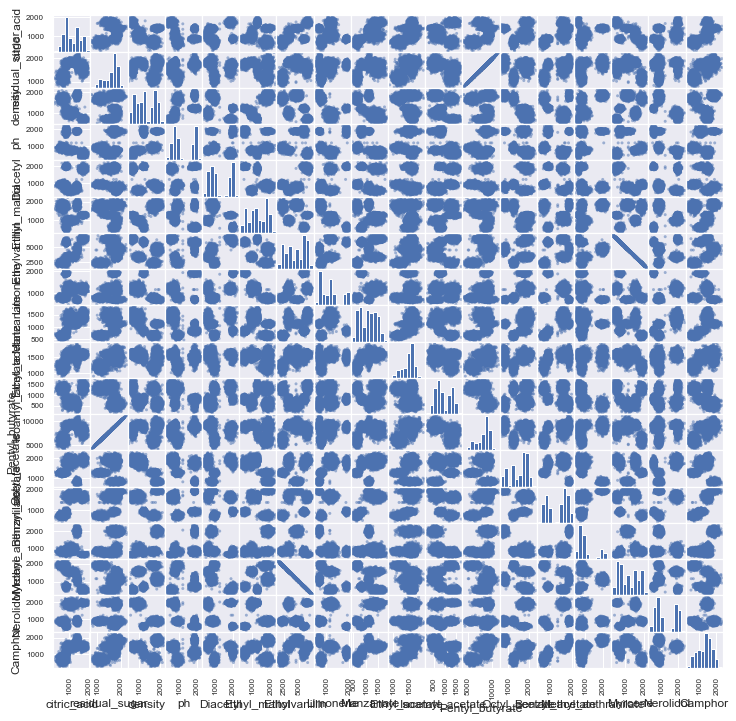

In [126]:
scatter_matrix(customer_data, figsize=(12,12));

### 2.1 Organise the children into groups that have a similar preference for flavours of sweets

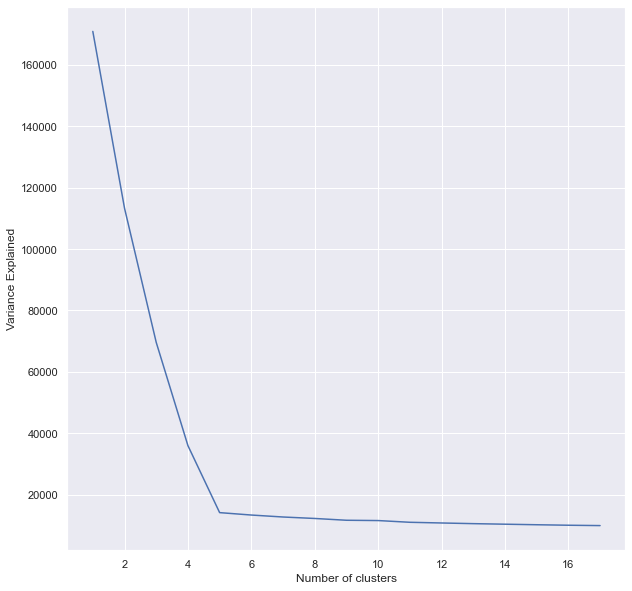

In [127]:
wx = []

for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(standardized_customer_data_df)
    wx.append(kmeans.inertia_)
plt.plot(range(1, 18), wx)
plt.xlabel('Number of clusters')
plt.ylabel('Variance Explained')
plt.show()

In [128]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(standardized_customer_data_df)
y_km=kmeans.fit_predict(standardized_customer_data_df)

<AxesSubplot:>

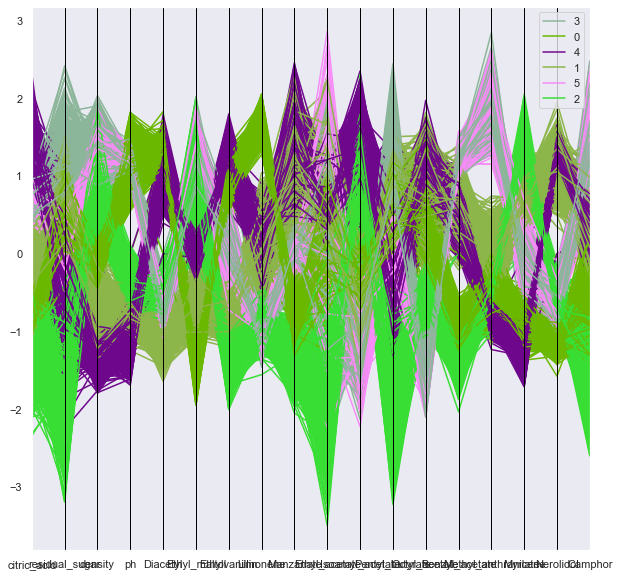

In [129]:
standardized_customer_data_df['cluster'] = y_km
pd.plotting.parallel_coordinates(standardized_customer_data_df, 'cluster')

### 2.2 2. Make a recommendation for the number of groups you would select to sell the most sweets to the most children

In [130]:
unique, counts = np.unique(y_km, return_counts=True)
dict(zip(unique, counts))

{0: 1944, 1: 1901, 2: 1862, 3: 888, 4: 1907, 5: 995}

the groups that have the most children are the clusters labelled 0, 1, 2, 4. And I will choose these 4 groups to sell the most sweets to the
most children.

### 2.3 How much of each of the flavour chemicals would you use for each group of children?

In [132]:
customer_data[y_km==0]

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Benzyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor
1,840.0,1738.0,1127.0,1698.0,2117.0,540.0,5782.0,2049.0,815.0,1452.0,783.0,8959.0,2116.0,1004.0,743.0,747.0,517.0,823.0
13,843.0,1723.0,1232.0,1719.0,1958.0,620.0,6412.0,1914.0,899.0,1509.0,784.0,8754.0,1896.0,993.0,885.0,526.0,587.0,1210.0
15,923.0,1857.0,1338.0,2129.0,1942.0,643.0,5921.0,1885.0,799.0,1436.0,817.0,9573.0,1716.0,920.0,847.0,707.0,703.0,1040.0
21,870.0,1657.0,1116.0,2039.0,2001.0,631.0,5572.0,1851.0,903.0,1369.0,829.0,8536.0,1819.0,857.0,903.0,809.0,549.0,1003.0
22,714.0,1708.0,1220.0,1850.0,2073.0,640.0,6399.0,1903.0,824.0,1471.0,930.0,8630.0,1684.0,931.0,896.0,543.0,507.0,988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9483,891.0,1644.0,1087.0,1812.0,1947.0,660.0,5713.0,1930.0,925.0,1427.0,822.0,8565.0,1737.0,817.0,927.0,731.0,723.0,780.0
9484,742.0,1879.0,1100.0,1772.0,2054.0,434.0,5884.0,2039.0,668.0,1366.0,823.0,9552.0,1586.0,908.0,776.0,722.0,544.0,1052.0
9486,828.0,1611.0,1192.0,1893.0,2064.0,563.0,5727.0,1910.0,716.0,1425.0,736.0,8347.0,1805.0,919.0,946.0,764.0,572.0,1051.0
9489,727.0,1754.0,1206.0,1772.0,2034.0,693.0,5499.0,1899.0,841.0,1618.0,828.0,8979.0,1738.0,856.0,687.0,854.0,495.0,1226.0


In [147]:
mean_data = customer_data
mean_data = mean_data.iloc[0:0].copy()
mean_data

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Benzyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor,cluster


The "cluster center" is the arithmetic mean of all the points belonging to the cluster.

In [161]:
for num in range(0,6):
    a={}
    for column in mean_data:  
        a[column] = customer_data[y_km==num][column].mean()
    mean_data = mean_data.append(a,ignore_index=True)
        

In [162]:
mean_data

,citric_acid,residual_sugar,density,ph,Diacetyl,Ethyl_maltol,Ethylvanillin,Limonene,Manzanate,Ethyl_acetate,Isoamyl_acetate,Pentyl_butyrate,Octyl_acetate,Benzyl_acetate,Methyl_anthranilate,Myrcene,Nerolidol,Camphor,cluster
0,840.094136,1714.628086,1215.736626,1875.736190,1989.016243,628.079218,5843.898663,1907.625825,832.519310,1482.822269,805.283951,8772.377058,1735.766461,919.352160,833.929858,718.752572,579.232346,1071.908951,0.0
1,1061.403472,1802.866386,976.023912,755.142111,585.032088,990.802209,3323.610205,1192.299316,1332.048679,1559.450289,655.030510,9213.821673,1811.045239,1639.221988,963.860074,1558.011047,1886.089427,1471.950552,1.0
2,669.140709,1170.022696,1683.028464,905.477981,935.497852,1744.914000,2301.849747,774.359828,653.177229,1189.154135,1294.149428,6048.391737,1271.278627,735.326423,837.097744,1899.316976,882.710526,690.101347,2.0
3,1405.916667,1891.815315,1847.336712,1875.260307,791.979253,1824.783784,4647.995495,688.219147,1122.226351,1499.397523,561.979730,9657.774775,842.822072,1884.210586,1979.014640,1117.317568,874.735360,1832.575450,3.0
4,1712.585832,1540.794772,700.100277,565.624621,1857.240470,1281.809649,6381.705094,1195.306240,1450.243838,1572.176193,1369.771614,7904.502469,1893.537914,1612.486418,671.939696,538.854801,1961.195952,1469.789569,4.0
5,1405.163819,1671.239196,1839.385930,1876.403015,791.499497,1822.266332,4645.924236,689.772066,1119.476382,1524.955779,562.647236,8553.028141,837.120603,1881.785930,1984.477387,1117.261412,886.833166,1842.241206,5.0


that's the quantity of the flavour chemicals I use for each group of children.